## STEP 1

### IMPORTING LIBRARIES

In [83]:
#basic libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image as im
import math

#for loading images from a folder
import cv2
import os

#fro loading a image
import matplotlib.image as mpimg

#for discrete wavelet transform
import pywt
import pywt.data

#for SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics

#for finding time
from time import time


## STEP 2

### COLLECTING IMAGES FROM FOLDER

In [91]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename)) 
        cv2.imshow('Original',img) #we are readingthe image as color image
        grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Grayscale', grayscale) #changing the color image to grayscale
        if img is not None:
            images.append(grayscale)
    return images

In [92]:
complete_data = load_images_from_folder('COMPLETE DATA')

In [93]:
comp_data = np.array(complete_data)

In [94]:
modified_complete_data = np.reshape(comp_data, (comp_data.shape[0] , comp_data.shape[1] * comp_data.shape[2]))

## STEP3

### creating dataframe for COMPLETE DATA of images

In [95]:
#converting the array of datavalues into dataframe 
face_data_initial=pd.DataFrame(modified_complete_data)
face_data_initial

0     1     2     3     4     5     6     7     8     9     ...  5590  \
0      46    56    45    45    45    48    63    57    65    61  ...    27   
1      46    56    45    45    45    48    63    57    65    61  ...    27   
2      28    40    42    45    45    41    28    38    34    43  ...    34   
3      51    36    32    28    26    28    31    40    54    64  ...   155   
4      50    65    44    39    56    60    57    41    37    38  ...    29   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
395    91   112   106   108   108   108   107   108   106   104  ...    28   
396    96   116   109   111   112   111   109   112   108   112  ...    77   
397    92   107   107   108   104   104   110   106   104   106  ...    28   
398    89   106   100   104   103   104   104   103   104   104  ...    69   
399    94   113   107   109   107   108   107   106   106   106  ...    39   

     5591  5592  5593  5594  5595  5596  5597  5598  5599  
0      33    27    29    26    24    30    28    31    24  
1      33    27    29    26    24    30    28    31    24  
2      32    29    23    30    25    27    24    28    20  
3     155   152   147   141   135   149    88    12    16  
4      26    29    22    28    30    30    30    34    27  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
395    28    29    36    33    34    32    32    36    28  
396    77    78    78    78    77    79    77    84    69  
397    31    35    28    31    31    35    33    36    28  
398    20    44    78    81    81    79    78    81    66  
399    26    33    32    27    27    30    27    32    27  

[400 rows x 5600 columns]

In [96]:
#for getting the target labels
target=[]
for i in range(400):
    weight=math.floor((i)/10) #we are using this because all the images are sorted according to their class 
    target.append(weight)

In [97]:
#adding target label to the dataframe
face_data_initial['target'] = target
face_data_initial

0    1    2    3    4    5    6    7    8    9  ...  5591  5592  5593  \
0    46   56   45   45   45   48   63   57   65   61  ...    33    27    29   
1    46   56   45   45   45   48   63   57   65   61  ...    33    27    29   
2    28   40   42   45   45   41   28   38   34   43  ...    32    29    23   
3    51   36   32   28   26   28   31   40   54   64  ...   155   152   147   
4    50   65   44   39   56   60   57   41   37   38  ...    26    29    22   
..   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
395  91  112  106  108  108  108  107  108  106  104  ...    28    29    36   
396  96  116  109  111  112  111  109  112  108  112  ...    77    78    78   
397  92  107  107  108  104  104  110  106  104  106  ...    31    35    28   
398  89  106  100  104  103  104  104  103  104  104  ...    20    44    78   
399  94  113  107  109  107  108  107  106  106  106  ...    26    33    32   

     5594  5595  5596  5597  5598  5599  target  
0      26    24    30    28    31    24       0  
1      26    24    30    28    31    24       0  
2      30    25    27    24    28    20       0  
3     141   135   149    88    12    16       0  
4      28    30    30    30    34    27       0  
..    ...   ...   ...   ...   ...   ...     ...  
395    33    34    32    32    36    28      39  
396    78    77    79    77    84    69      39  
397    31    31    35    33    36    28      39  
398    81    81    79    78    81    66      39  
399    27    27    30    27    32    27      39  

[400 rows x 5601 columns]

## STEP 4

### APPLYING DWT TO GET APPROXIMATION COMPONENT OF IMAGE

In [98]:
#function for DWT of an image
def appr_dwt(img):
    coeffs = pywt.dwt2(img, 'db3', mode='periodization')
    cA,(cH , cV ,cD )=coeffs 
    return cA.flatten()
      #we are flattening the array because we are trying to fit values into dataframe

Above we are doing single-level 2-D discrete wavelet transform (DWT) of the input data X using the wname wavelet. 

The reason for doing DWT and here we consider the Approximate coefficient matrix because it represnts the low frequency components of image and remaining three coefficients represnts the high frequency components of image.And all the important features of a original face can be obtained from the Approxiamtion coefficient Matrix. 

And for a image it returns the coefficients matrices cA , cH , cV , and cD.
###### cA represents Approximation Coefficient
###### cH represents Horizantal Coefficient
###### cV represents Vertical Coefficient
###### cD represents Diagonal Coefficient

Text(0.5, 1.0, 'cD')

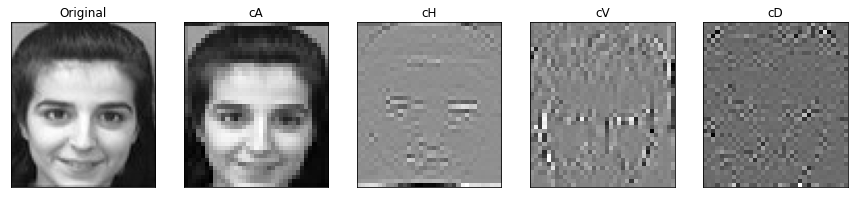

In [99]:
# example image for DWT
img = mpimg.imread("COMPLETE DATA/venu (491).jpg")

coeffs2 = pywt.dwt2(img, 'db3', mode='periodization')
cA,(cH , cV ,cD )=coeffs2

plt.figure(figsize=( 15,15 ))

plt.subplot(1,5,1)
plt.imshow(img, cmap='gray')
plt.xticks([]) 
plt.yticks([])
plt.title('Original')

plt.subplot(1,5,2)
plt.imshow(cA, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('cA')

plt.subplot(1,5,3)
plt.imshow(cH, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('cH')

plt.subplot(1,5,4)
plt.imshow(cV, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('cV')

plt.subplot(1,5,5)
plt.imshow(cD, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('cD')



In [100]:
#finding DWT for complete dataset

dwt_comp_data=[]
for i in range(400):
    dis_wt = appr_dwt(comp_data[i])
    dwt_comp_data.append(dis_wt)


In [101]:
#making a dataframe for DWT approximation coefficients

dwt_data=pd.DataFrame(dwt_comp_data)

dwt_data

0           1           2           3           4           5     \
0     30.826123  181.980382  259.683445  279.033915  290.023780  292.872989   
1     30.826123  181.980382  259.683445  279.033915  290.023780  292.872989   
2     51.100929   59.659637   61.198049   64.646250   59.406162   49.890832   
3     42.109679   68.472939   65.261149   59.701423   62.248060   65.518955   
4     65.292340   35.803568   97.239690  152.123307  164.145675  175.988444   
..          ...         ...         ...         ...         ...         ...   
395   93.269206  164.653109  172.692536  166.295619  187.586898  165.673878   
396  149.250278  141.851301  132.792599  170.294459  106.338486   66.404007   
397   89.655212  163.830957  167.878786  157.606936  192.750103  181.229228   
398  144.342034  125.426226  125.579259  126.358414  126.552025  127.927808   
399   88.149281  170.279389  171.980124  174.066560  169.852166  197.237816   

           6           7           8           9     ...        1390  \
0    304.085541  297.533957  298.257581  281.590392  ...  300.390747   
1    304.085541  297.533957  298.257581  281.590392  ...  300.390747   
2    125.082116  112.869945  249.824093  298.698480  ...  324.772584   
3     49.546780   58.527212  123.187718  106.735310  ...  342.368734   
4    187.549228  190.412169  186.918505  178.988196  ...  328.526621   
..          ...         ...         ...         ...  ...         ...   
395   84.624113  100.654477  219.751777  236.925243  ...  170.685991   
396  139.326390  200.285557  182.821457  149.957322  ...  272.849945   
397   59.627890  143.689717  224.490374  227.280967  ...  178.229716   
398  127.372054  139.733394   91.443877   56.169810  ...  294.108367   
399  151.087969   76.083139  188.469407  208.170673  ...  182.935751   

           1391        1392        1393        1394        1395        1396  \
0    271.985010  286.009848  296.325618  243.847218   51.303469   75.569100   
1    271.985010  286.009848  296.325618  243.847218   51.303469   75.569100   
2    292.262552  177.716492   65.880951   62.663792   77.005420   75.412642   
3    354.794575  348.617598  359.302905  382.734168  386.285118  376.958430   
4    321.477474  301.653276  354.147925  179.586325   67.149579   60.525579   
..          ...         ...         ...         ...         ...         ...   
395  182.974716  200.999586  112.761159  111.468501   72.408370   77.630542   
396  241.616401  143.712699  191.215541  186.635058  186.213077  186.670637   
397  169.078670  195.767543  122.711581  102.875392   79.796590   74.389314   
398  295.283019  297.353240  299.132367  287.342939  208.738071   91.696030   
399  185.208693  200.916413   46.036770  107.508801   92.688785   68.501733   

           1397        1398        1399  
0     63.220070   63.566471   79.384857  
1     63.220070   63.566471   79.384857  
2     71.576162   62.973735   64.810828  
3    359.581730  368.346925  238.613845  
4     69.681157   74.941134   82.101945  
..          ...         ...         ...  
395   74.747880   77.512487   76.168364  
396  186.671835  186.959208  194.948235  
397   75.994188   75.551052   77.752362  
398  189.201250  192.492977  196.730944  
399   68.493311   67.014434   64.060296  

[400 rows x 1400 columns]

## STEP 5

### PRINCIPAL COMPONENT ANALYSIS(EIGENFACES)

##### STEP 1:Finding the Mean Face

Text(0.5, 1.0, 'Mean Face')

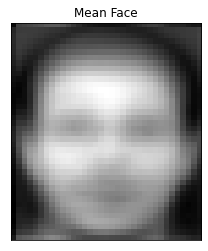

In [102]:
sum=0
for i in range(400):
    sum += dwt_comp_data[i]
mean_face = sum/400

plt.imshow(mean_face.reshape(40,35),cmap='gray');
plt.xticks([])
plt.yticks([])
plt.title('Mean Face')

##### STEP 2 : Finding the deviation of every image with mean face

In [103]:
faces_norm = dwt_comp_data - mean_face
faces_norm.shape

(400, 1400)

##### STEP 3 : Finding the Covariance Matrix

In [104]:
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

(1400, 1400)

##### STEP 4 : Finding the Eigen Vectors for the Covariance Matrix

In [105]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
eigen_vecs.shape

(1400, 1400)

##### STEP 5 : Printing the first Ten Eigen vectors i.e Eigen Faces

Text(0.5, 0.98, 'First 10 Eigenfaces')

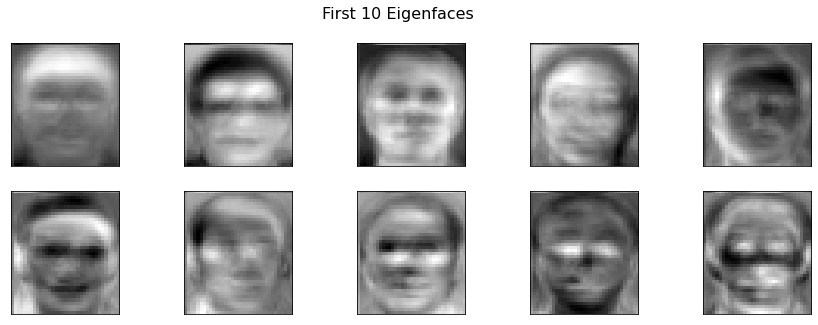

In [106]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(40,35)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

##### STEP 6 : Reconstruction with Eigenfaces

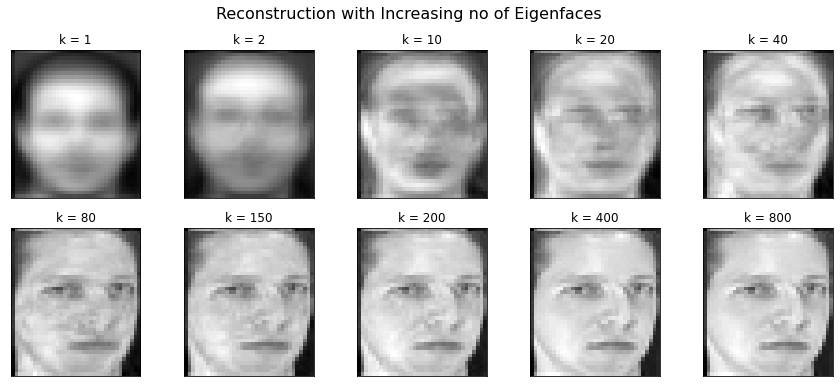

In [107]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,149,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1_1.jpg' whose index is 0.
    weight = faces_norm[0,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(projected_face.reshape(40,35)+mean_face.reshape(40,35),cmap='gray');
fig.suptitle(("Reconstruction with Increasing no of Eigenfaces"), fontsize=16);


from the above reconstructed images,we can observe that by considering k=200 we can observe most of features of original image...i.e we can say that 200 Eigen Faces are sufficient fro perfect reconstruction of a given image

##### STEP 7 : Finding the Matrix of weights for every image 

In [108]:
weight_matrix = []
for i in np.arange(400):
    weight = faces_norm[i,:].dot(eigen_vecs[:,:200])
    weight_matrix.append(weight)

In [109]:
np.shape(weight_matrix)

(400, 200)

here PCA is used as Dimensionality reduction technique also,because intially we have dwt_data size as (400,1400) but now weights_matrix is just (400,200) i.e here 200 weights are suffienct for reconstructing a given image,i.e we can represnt a image with 1400 features as a image with 200 weigths as its features. 

In [110]:
df = pd.DataFrame(weight_matrix)
print("\n Weights of images DataFrame: ")
df['target'] = target
df


 Weights of images DataFrame: 


0           1            2            3            4  \
0    2227.210397  600.329971  -463.790594 -1009.608792  1776.095214   
1    2227.210397  600.329971  -463.790594 -1009.608792  1776.095214   
2    1981.717540  289.893329   685.341627   -47.873817   755.994571   
3    2382.571541  871.425231  -230.596275 -1929.968462  -212.594868   
4    2690.520323  622.444110    27.564704 -1571.255872    43.143182   
..           ...         ...          ...          ...          ...   
395   469.641613  747.138009 -1130.423986   391.685977   -25.065341   
396   829.935053  917.622021  -761.176945   487.817656   249.881978   
397   606.326981  687.889990 -1091.952868   244.845704  -438.489348   
398  1018.563997  936.540685  -581.615448   -43.415820   158.397088   
399   394.133789  344.155635 -1499.414458   769.956951   660.750130   

              5           6           7           8           9  ...  \
0    276.216534  901.886586 -200.003295 -288.373170   -4.620706  ...   
1    276.216534  901.886586 -200.003295 -288.373170   -4.620706  ...   
2   -795.492712  309.421041 -164.689619 -788.706342  641.140916  ...   
3   -615.777141 -547.132066  685.998689  383.400436  639.845507  ...   
4   -347.311410  398.641117 -122.707158   81.511481  110.601015  ...   
..          ...         ...         ...         ...         ...  ...   
395 -348.414181   39.385234 -836.843065 -663.668083  362.647090  ...   
396 -310.392023 -295.194601  681.193788  133.784035   32.452047  ...   
397 -138.453344   88.341004 -567.578422 -785.723942  234.082706  ...   
398 -593.938998 -789.560356  950.873079  352.475717  -52.869250  ...   
399 -659.542830 -211.787317 -454.570257 -233.395594  309.825437  ...   

            191         192        193        194         195        196  \
0     -5.068398  -38.704525  37.905357   3.406923  -72.989056 -12.674001   
1     -5.068398  -38.704525  37.905357   3.406923  -72.989056 -12.674001   
2    -16.217923 -138.045747  28.451463  60.151160   -3.414423 -69.948426   
3    104.056342  -38.079531 -11.498585  32.113153  -78.563386 -37.004645   
4     23.088324   46.801035   6.262088 -33.031764  105.984860  -3.414541   
..          ...         ...        ...        ...         ...        ...   
395   -0.772296   21.942228 -37.549870 -29.656430   31.281676  45.067840   
396   47.201714   84.574405 -32.166110  -4.371049   29.991818 -23.340207   
397  -31.856188   -8.418773  -5.891075  46.724076   38.637073  -0.736816   
398   -0.185012   63.628741  52.140478 -28.293336   23.751577  34.268925   
399   52.956912   54.613036 -85.770514 -26.322436  -21.906259   3.898751   

            197        198        199  target  
0    -24.282580 -28.319390  -1.426838       0  
1    -24.282580 -28.319390  -1.426838       0  
2      0.809193 -36.529370 -12.166176       0  
3    -55.048744  55.521919   6.759890       0  
4     68.222278 -28.662606 -40.291392       0  
..          ...        ...        ...     ...  
395   21.607671  -3.358107  46.158576      39  
396 -112.603749 -25.449013 -74.091515      39  
397   39.517567 -24.877550  33.630081      39  
398   37.482194  -8.107875 -31.883298      39  
399  -75.417541  17.452953   5.485361      39  

[400 rows x 201 columns]

## STEP 6

### Support Vector Machines (SVM)

#### STEP 1 : Finding the Test and Train splits

In [111]:
weights_df = df.drop( ["target"] , axis=1 )

X_train, X_test, Y_train, Y_test = train_test_split(weights_df,df["target"] , train_size=0.7, random_state = 200)

#### STEP 2 : finding the Y_predicted

In [112]:
out_linear = svm.SVC(kernel='linear', C=4).fit(X_train, Y_train)
Y_pred_svm = out_linear.predict(X_test)


#### STEP 3 : Finding the Accuracy of the Recognition System

In [113]:
accuracy_svm = metrics.accuracy_score(Y_test, Y_pred_svm)
print(f'The accuracy with SVM algorithm is :{round(accuracy_svm*100)}%')

The accuracy with SVM algorithm is :97%


#### STEP 4 : Classification report

In [114]:
print(metrics.classification_report(Y_test, Y_pred_svm))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         5
          15       1.00      0.50      0.67         4
          16       1.00      1.00      1.00         4
          17       0.75    

hence we are getting an Accuracy of 97 percent by considering the recognition using SVM and by using kernel as Linear kernel function